In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets[:20]

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5])

In [6]:
train_data.mean(axis=0).shape

(13,)

In [7]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
train_data.shape

(404, 13)

In [9]:
# Model definition

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

In [19]:
seed = 7
model = KerasRegressor(build_fn=build_model, epochs=100, batch_size=10, verbose=0)
results = cross_val_score(model, train_data, train_targets, cv=4, scoring='neg_mean_absolute_error')

In [22]:
# mean absolute erorrs

[-x for x in results]

[2.0142693302418926,
 2.3231820182044904,
 2.4991349994546117,
 2.6517432108964059]

## Grid Search Deep Learning Model Parameters

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import numpy

# fix random seed for reproducibility
seed = 7
# create model
model = KerasRegressor(build_fn=build_model, verbose=0)

# Grid search epochs, batch size
epochs = [50, 100, 200, 400]
epochs = [100]

batches = [10, 20, 50]
batches = [5, 10, 20]

param_grid = dict(epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error')
grid_result = grid.fit(train_data, train_targets)

In [44]:
grid_result

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8a57939898>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [100], 'batch_size': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [45]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -2.378051 using {'epochs': 100, 'batch_size': 5}


In [53]:
means = grid_result.cv_results_
means

{'mean_fit_time': array([ 11.83142662,   7.51315538,   6.73973481]),
 'mean_score_time': array([ 0.66200805,  0.75336599,  0.72342523]),
 'mean_test_score': array([-2.37805085, -2.41684322, -2.47693596]),
 'mean_train_score': array([-1.25712286, -1.51166551, -1.65114305]),
 'param_batch_size': masked_array(data = [5 10 20],
              mask = [False False False],
        fill_value = ?),
 'param_epochs': masked_array(data = [100 100 100],
              mask = [False False False],
        fill_value = ?),
 'params': ({'batch_size': 5, 'epochs': 100},
  {'batch_size': 10, 'epochs': 100},
  {'batch_size': 20, 'epochs': 100}),
 'rank_test_score': array([1, 2, 3], dtype=int32),
 'split0_test_score': array([-2.26648575, -2.33717986, -2.26973753]),
 'split0_train_score': array([-1.31456842, -1.68710879, -1.77171337]),
 'split1_test_score': array([-2.50746579, -2.37015969, -2.59644611]),
 'split1_train_score': array([-1.23762205, -1.4415398 , -1.70848698]),
 'split2_test_score': array([-2.36

In [57]:
%time history = grid_result.best_estimator_.fit(train_data, train_targets, verbose=1)

Epoch 1/100
404/404 [==============================] - 1s - loss: 382.2340 - mean_absolute_error: 17.0892     
Epoch 2/100
404/404 [==============================] - 0s - loss: 75.9258 - mean_absolute_error: 6.4547     
Epoch 3/100
404/404 [==============================] - 0s - loss: 28.1456 - mean_absolute_error: 3.7505     
Epoch 4/100
404/404 [==============================] - 0s - loss: 20.0236 - mean_absolute_error: 3.1200     
Epoch 5/100
404/404 [==============================] - 0s - loss: 16.8870 - mean_absolute_error: 2.8221     
Epoch 6/100
404/404 [==============================] - 0s - loss: 15.2049 - mean_absolute_error: 2.7001     
Epoch 7/100
404/404 [==============================] - 0s - loss: 13.7905 - mean_absolute_error: 2.5716     
Epoch 8/100
404/404 [==============================] - 0s - loss: 12.4882 - mean_absolute_error: 2.3990     
Epoch 9/100
404/404 [==============================] - 0s - loss: 11.9943 - mean_absolute_error: 2.4156    
Epoch 10/100
404/4

404/404 [==============================] - 0s - loss: 4.8578 - mean_absolute_error: 1.5490     
Epoch 76/100
404/404 [==============================] - 0s - loss: 4.9143 - mean_absolute_error: 1.5653     
Epoch 77/100
404/404 [==============================] - 0s - loss: 4.7081 - mean_absolute_error: 1.5498     
Epoch 78/100
404/404 [==============================] - 0s - loss: 4.8402 - mean_absolute_error: 1.5438     
Epoch 79/100
404/404 [==============================] - 0s - loss: 4.7193 - mean_absolute_error: 1.5250     
Epoch 80/100
404/404 [==============================] - 0s - loss: 4.4838 - mean_absolute_error: 1.4984     
Epoch 81/100
404/404 [==============================] - 0s - loss: 4.5999 - mean_absolute_error: 1.5274     
Epoch 82/100
404/404 [==============================] - 0s - loss: 4.4813 - mean_absolute_error: 1.5076     
Epoch 83/100
404/404 [==============================] - 0s - loss: 4.5858 - mean_absolute_error: 1.5034     
Epoch 84/100
404/404 [==========

In [64]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.378051 using {'epochs': 100, 'batch_size': 5}
-2.378051 (0.099313) with: {'epochs': 100, 'batch_size': 5}
-2.416843 (0.090681) with: {'epochs': 100, 'batch_size': 10}
-2.476936 (0.147333) with: {'epochs': 100, 'batch_size': 20}


In [68]:
predictions = grid_result.predict(test_data)

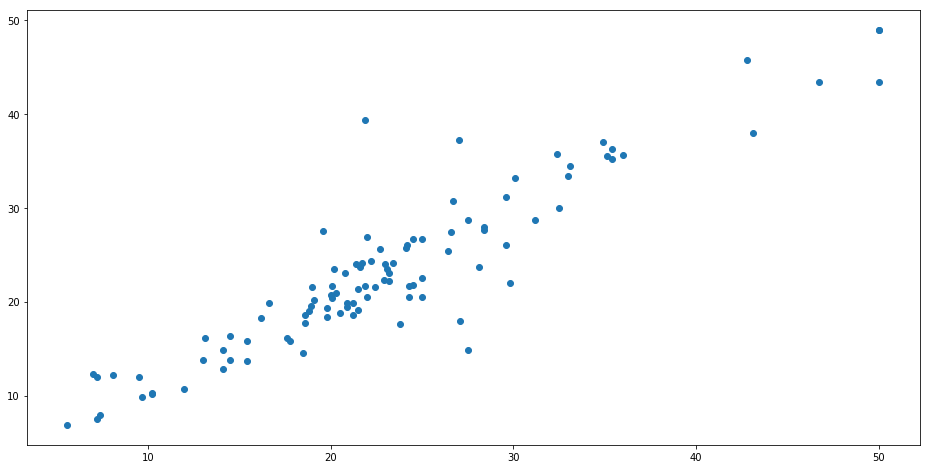

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(test_targets, predictions)